# Unit 1: Exploratory Data Analysis on the MovieLens 100k Dataset

The [MovieLens](https://grouplens.org/datasets/movielens/) datasets are for recommender systems practitioners and researchers what MNIST is to computer vision people. There are different sizes determined by the number of movie ratings provided by a group of users.

In [4]:
%load_ext autoreload
%autoreload 2

import os
import sys
import math

import numpy as np
import scipy as sp
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("whitegrid")

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

In [10]:
from recsys_training.data import genres

In [6]:
ml100k_ratings_filepath = '../data/raw/ml-100k/u.data'
ml100k_item_filepath = '../data/raw/ml-100k/u.item'
ml100k_user_filepath = '../data/raw/ml-100k/u.user'

## Load Data

In [7]:
ratings = pd.read_csv(ml100k_ratings_filepath,
                      sep='\t',
                      header=None,
                      names=['user', 'item', 'rating', 'timestamp'],
                      engine='python')

In [11]:
items = pd.read_csv(ml100k_item_filepath, sep='|', header=None,
                    names=['item', 'title', 'release', 'video_release', 'imdb_url']+genres,
                    engine='python')

In [9]:
users = pd.read_csv(ml100k_user_filepath, sep='|', header=None,
                    names=['user', 'age', 'gender', 'occupation', 'zip'])

## Data Exploration

In this unit, we like to get a better picture of the data we use for making recommendations in the upcoming units. Therefore, let's have a look to some statistics to get confident with the data and algorithms.

Let's find out the following:

* number of users
* number of items
* rating distribution
* user / item mean ratings
* popularity skewness
    * user rating count distribution
    * item rating count distribution
* time
* sparsity
* user / item features

### number of users

In [50]:
n_users = ratings['user'].unique().shape[0]
n_users

943

In [16]:
ratings['user'].unique().min()

1

In [17]:
ratings['user'].unique().max()

943

### number of items

In [49]:
n_items = ratings['item'].unique().shape[0]
n_items

1682

In [20]:
ratings['item'].unique().min()

1

In [22]:
ratings['item'].unique().max()

1682

### user rating distribution

In [26]:
ratings['rating'].value_counts().sort_index()

1     6110
2    11370
3    27145
4    34174
5    21201
Name: rating, dtype: int64

In [27]:
ratings['rating'].value_counts(normalize=True).sort_index()

1    0.06110
2    0.11370
3    0.27145
4    0.34174
5    0.21201
Name: rating, dtype: float64

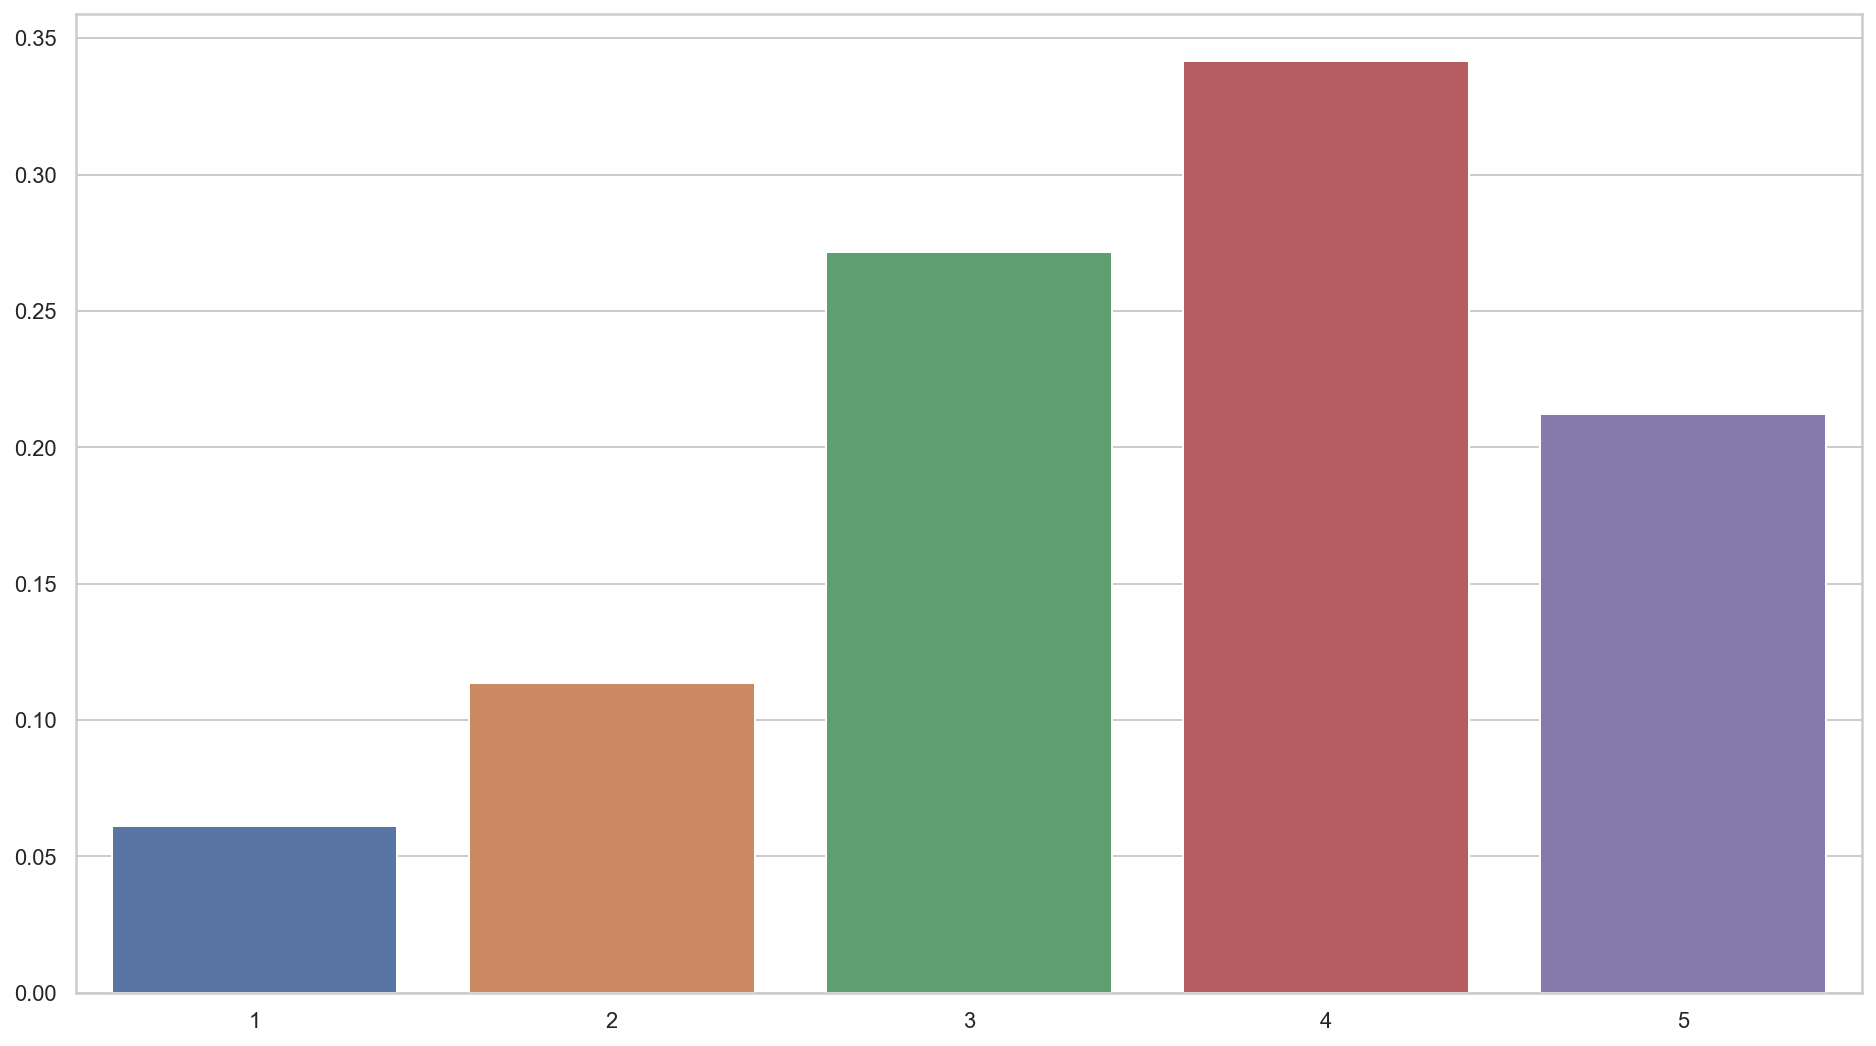

In [28]:
sns.barplot(x=ratings['rating'].value_counts(normalize=True).sort_index().index,
            y=ratings['rating'].value_counts(normalize=True).sort_index().values)

In [29]:
ratings['rating'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

### user rating count distribution

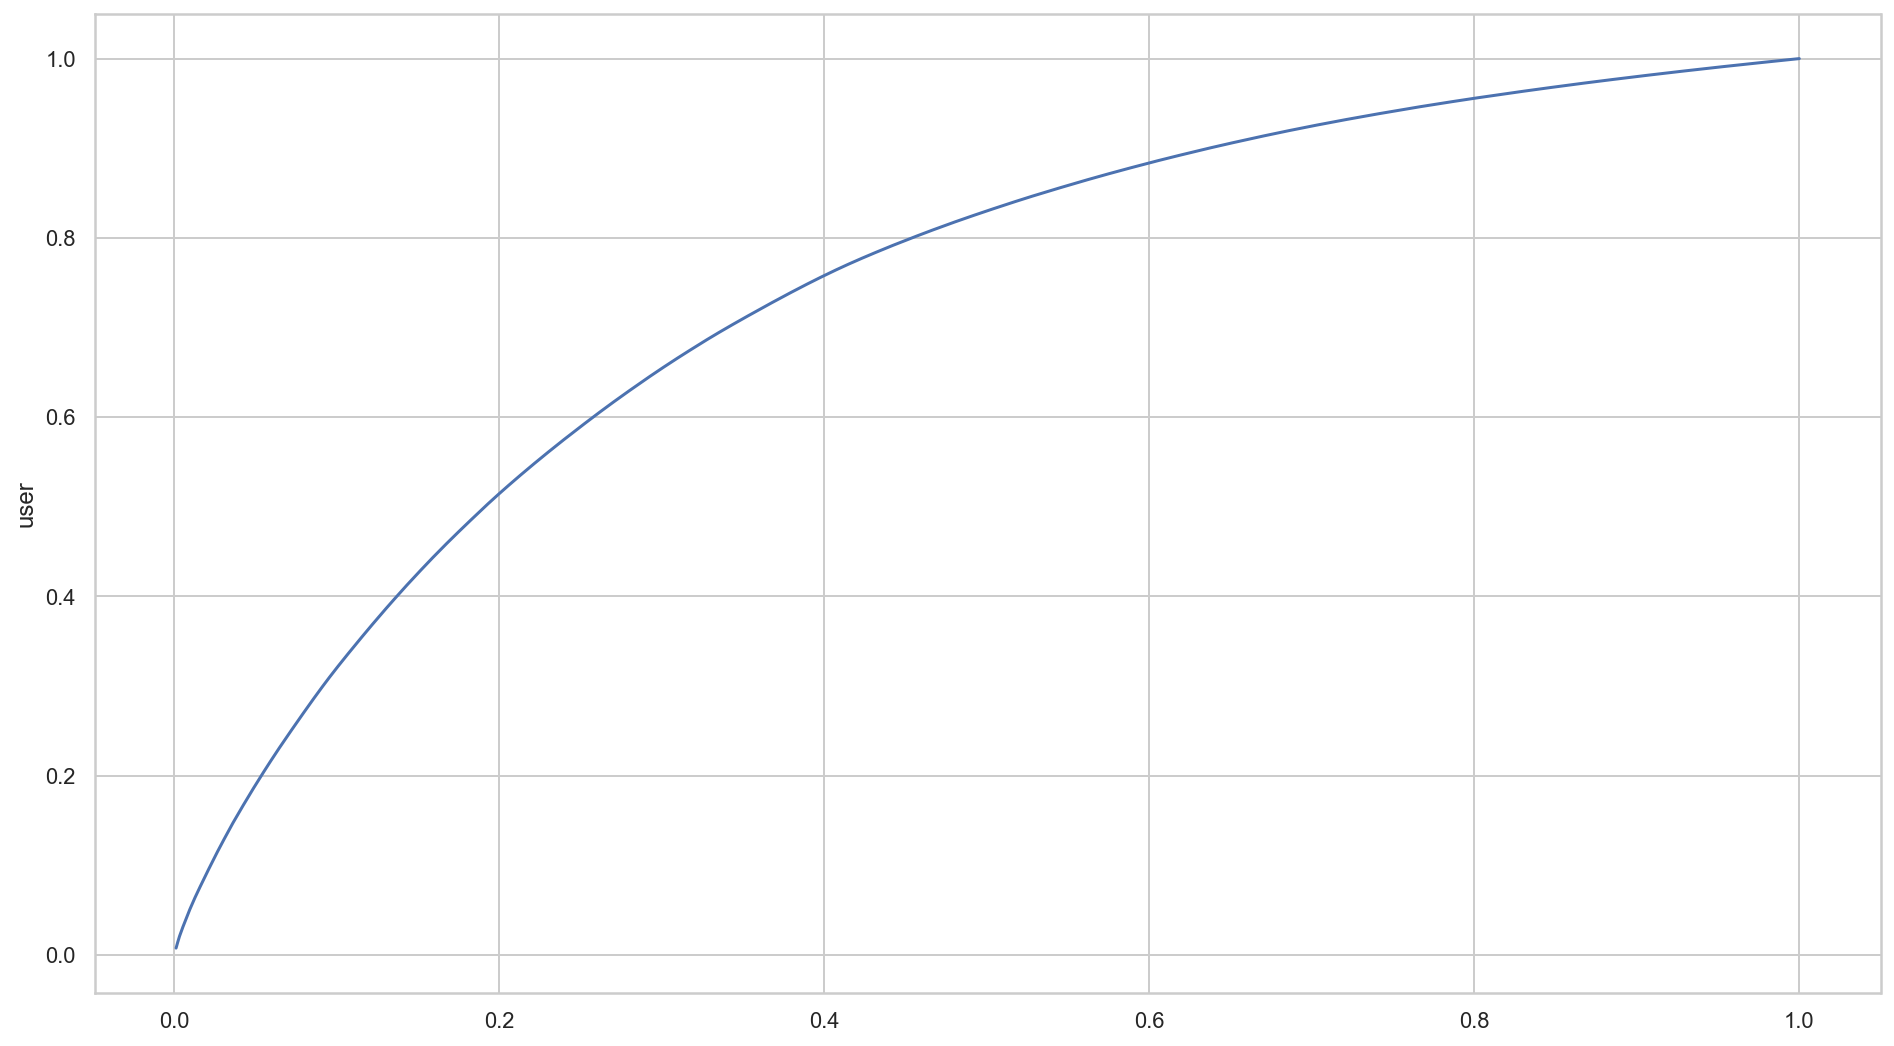

In [51]:
quantiles = ratings['user'].value_counts(normalize=True).cumsum()

sns.lineplot(np.arange(n_users)/n_users+1/n_users,
             quantiles)

### item rating count distribution

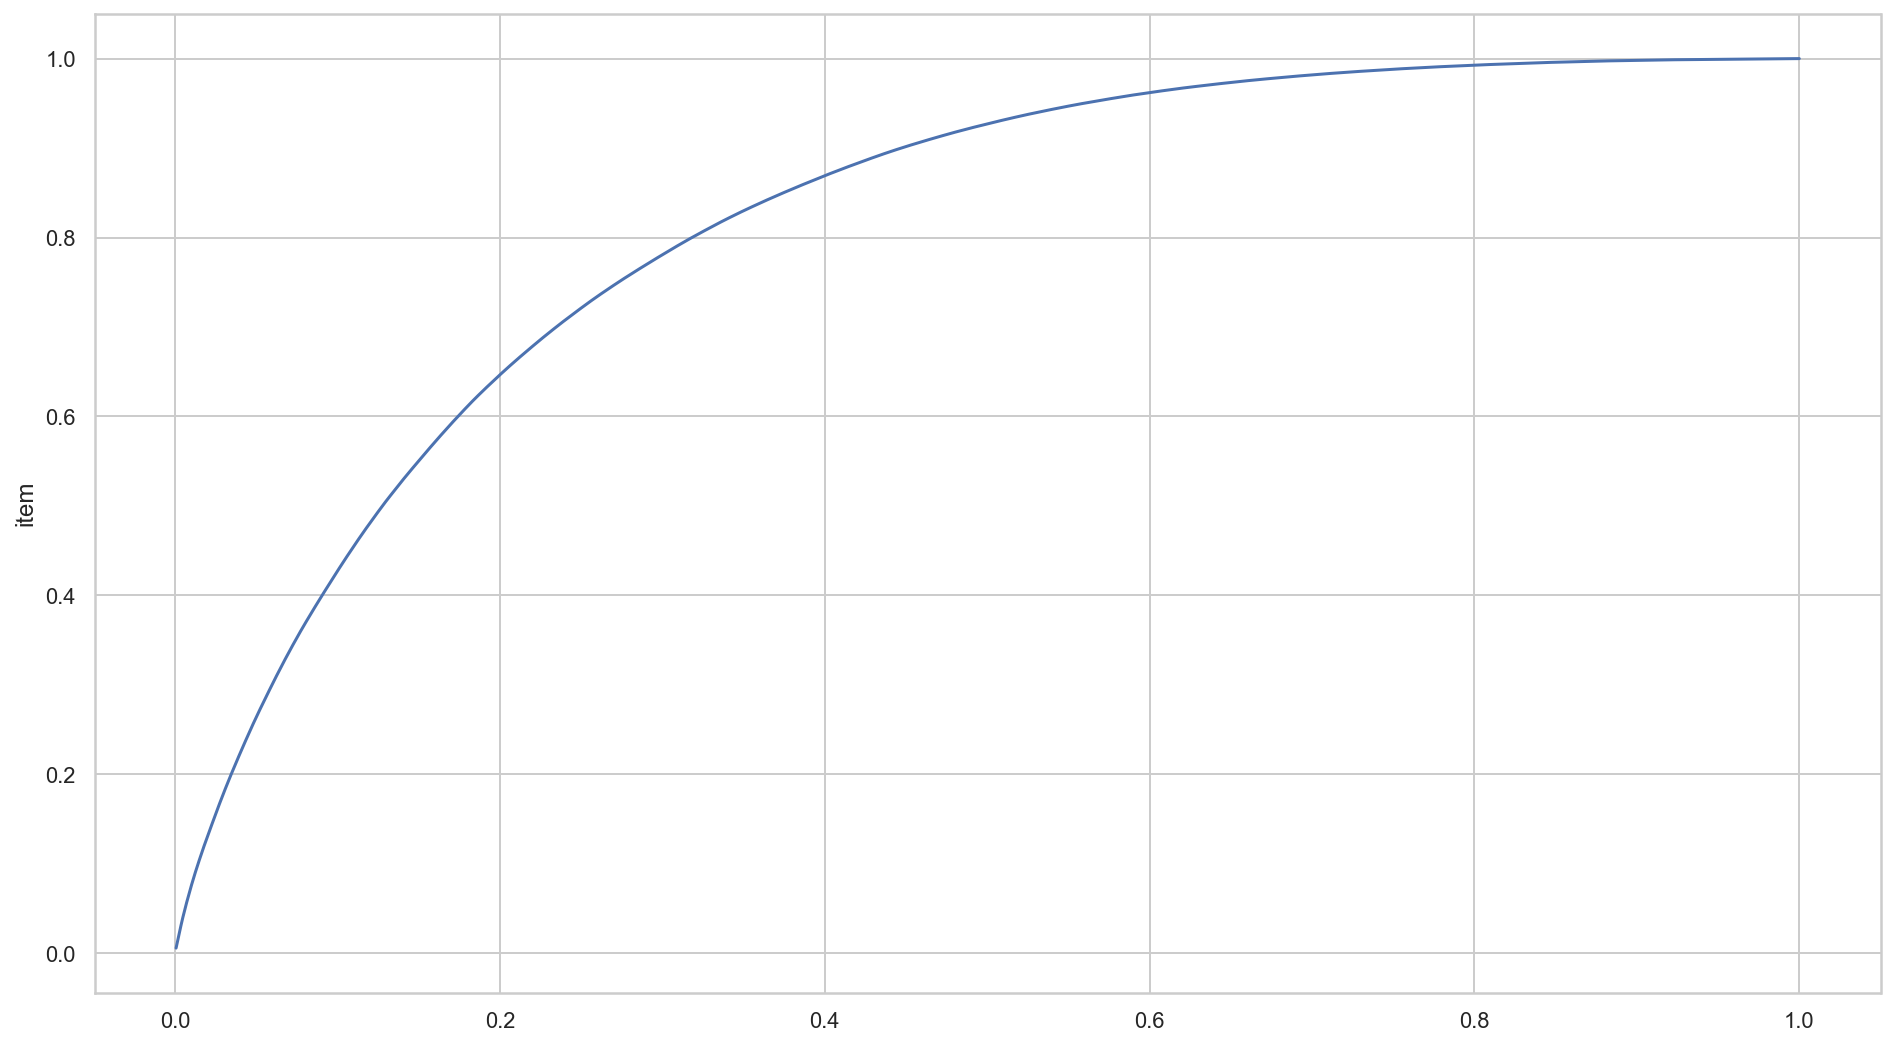

In [52]:
quantiles = ratings['item'].value_counts(normalize=True).cumsum()

sns.lineplot(np.arange(n_items)/n_items+1/n_items,
             quantiles)

### user mean ratings

In [57]:
user_mean_ratings = ratings[['user', 'rating']].groupby('user').mean().reset_index(drop=True)

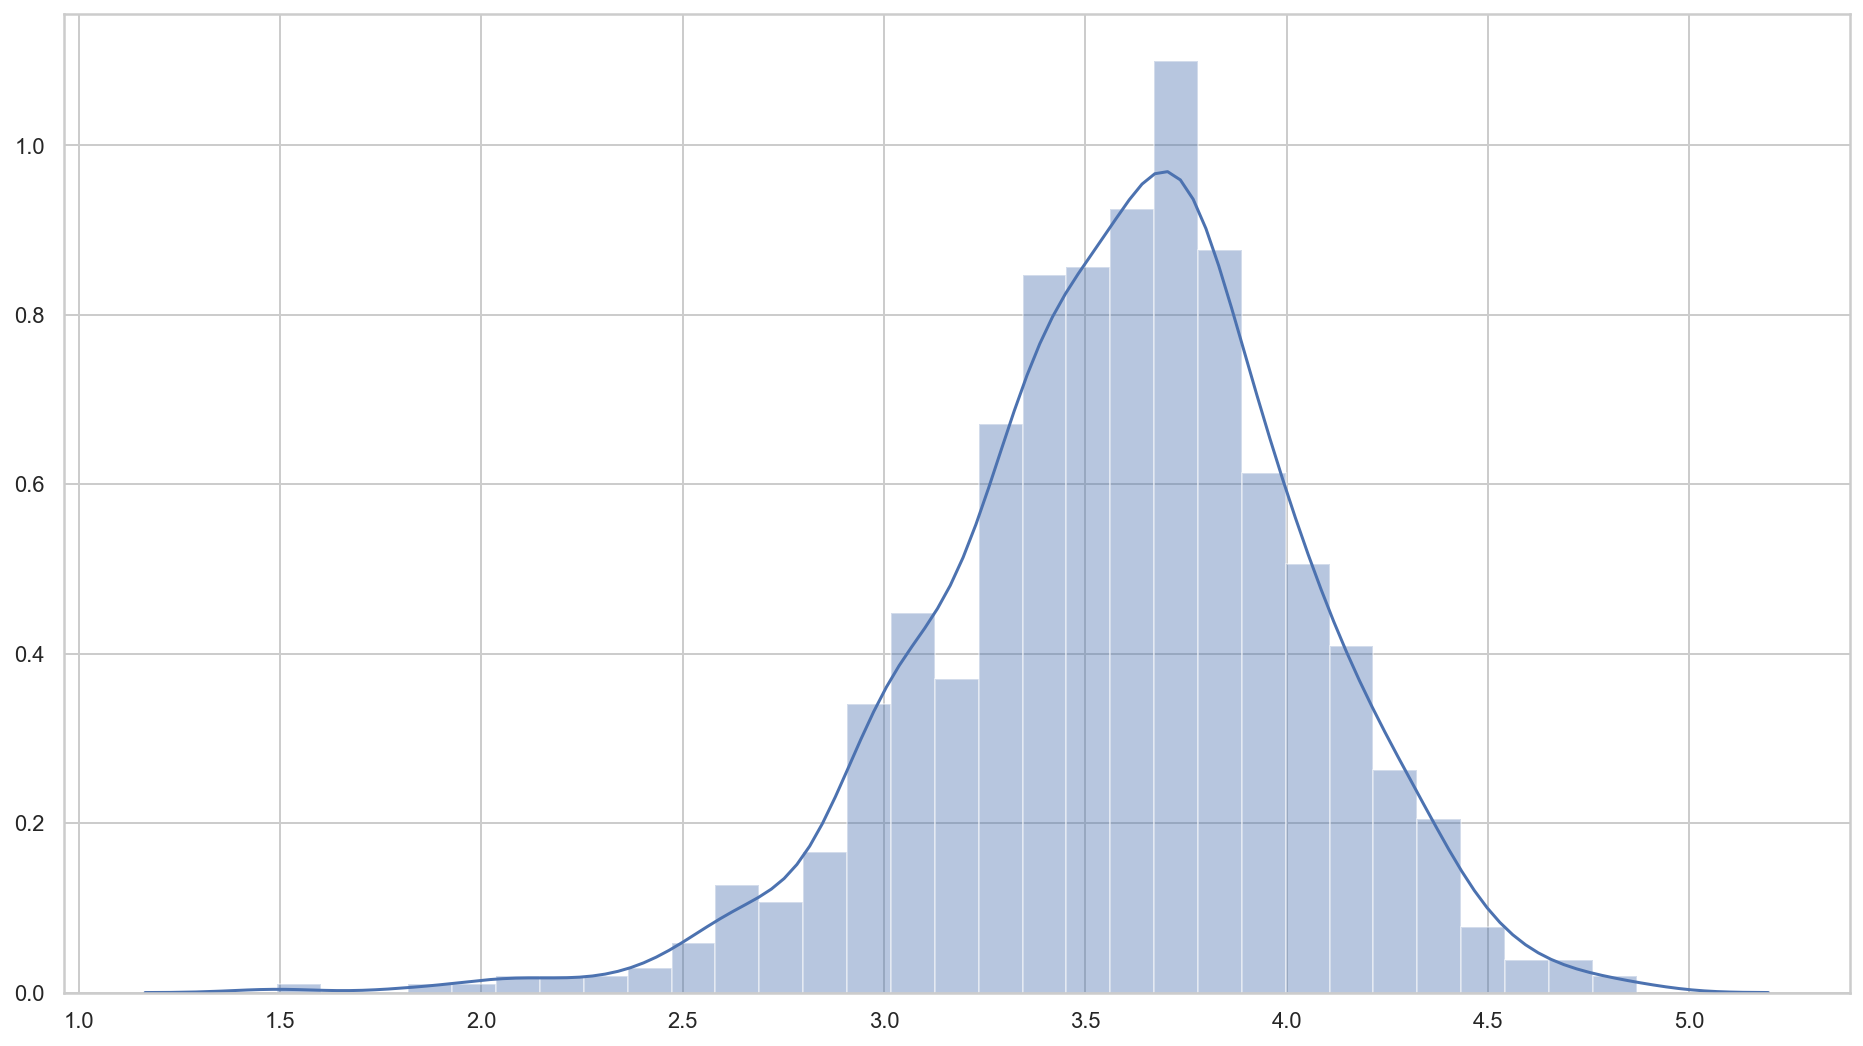

In [59]:
sns.distplot(user_mean_ratings)

### item mean ratings

In [60]:
item_mean_ratings = ratings[['item', 'rating']].groupby('item').mean().reset_index(drop=True)

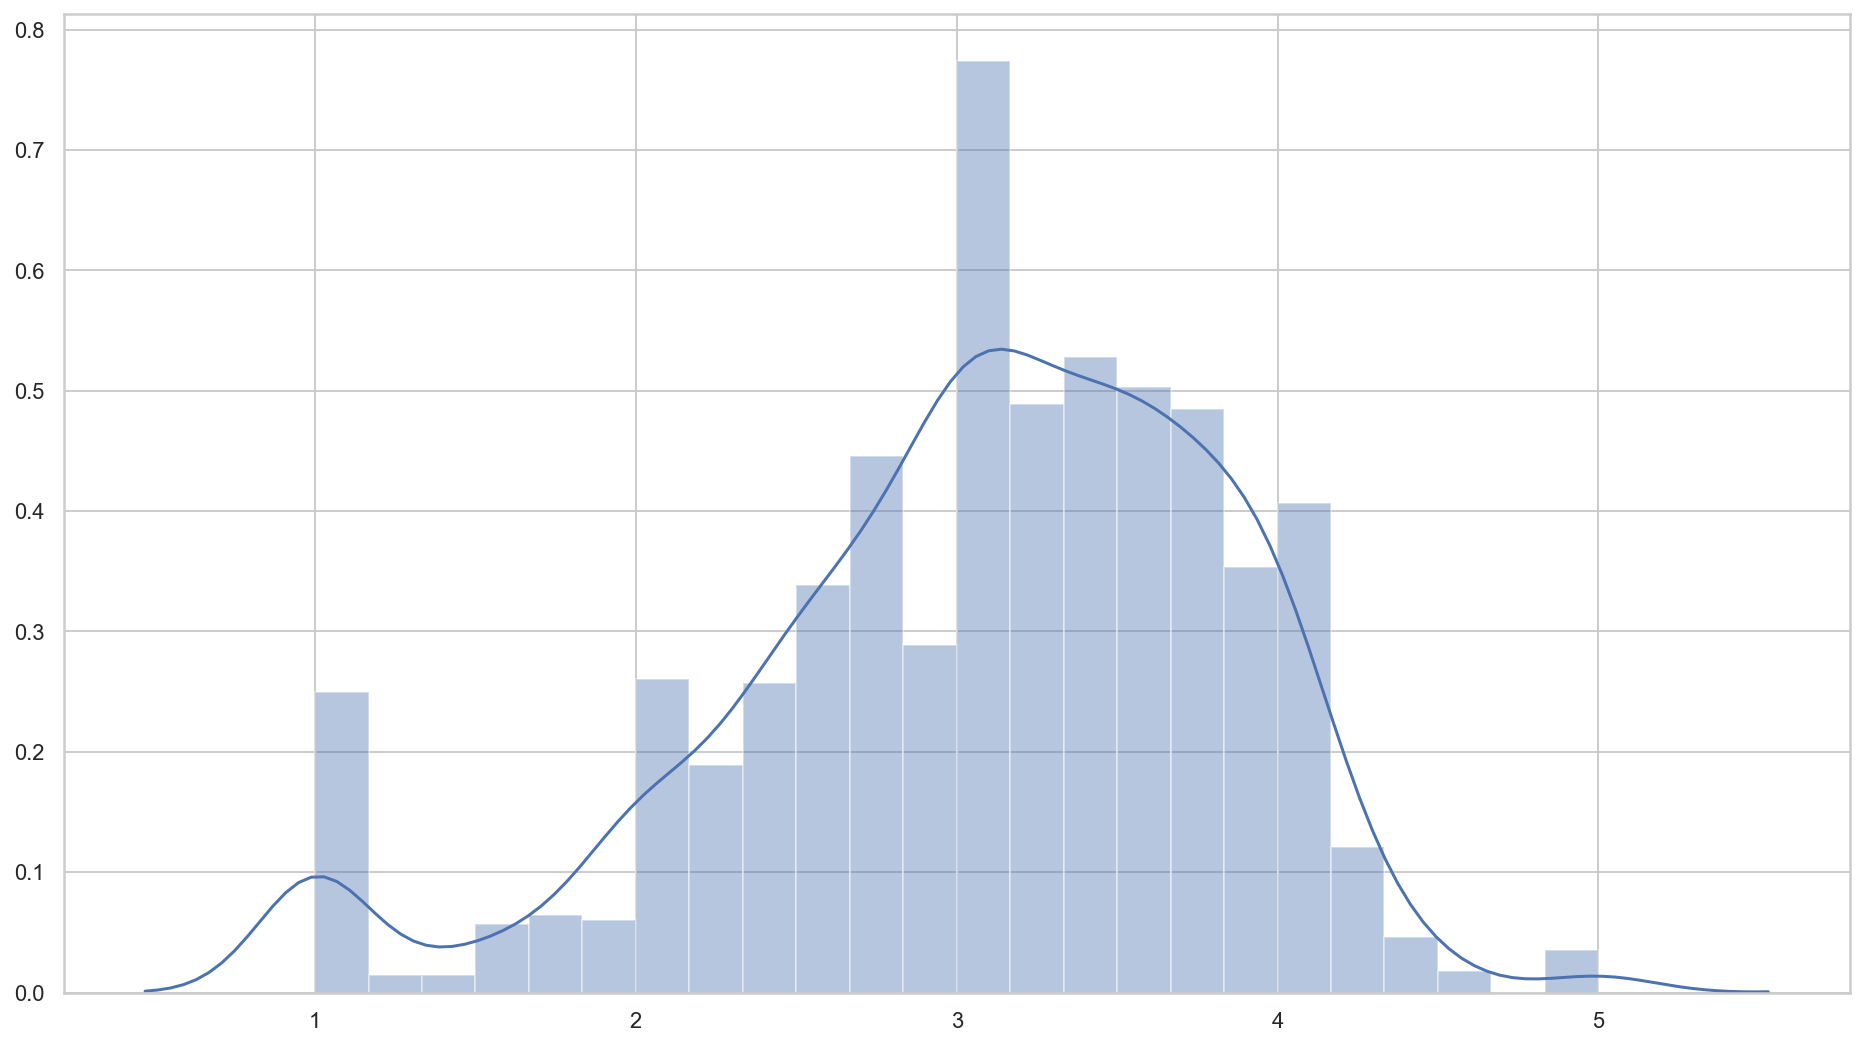

In [61]:
sns.distplot(item_mean_ratings)

### sparsity

In [62]:
n_users

943

In [63]:
n_items

1682

In [73]:
# count the uniquely observed ratings
observed_ratings = ratings[['user', 'item']].drop_duplicates().shape[0]
observed_ratings

100000

In [71]:
potential_ratings = n_users * n_items
potential_ratings

1586126

In [74]:
density = observed_ratings / potential_ratings

In [75]:
density

0.06304669364224531

In [76]:
sparsity = 1 - density

In [77]:
sparsity

0.9369533063577546